In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.text as mtext
from matplotlib import cm
from matplotlib.colors import Normalize, LinearSegmentedColormap
%matplotlib inline

import initialise
import common
from display_utils import display_frames
from analysis_utils import calc_statistics, sort_file_list, plot_results

In [2]:
SMALL_SIZE = 7
MEDIUM_SIZE = 7
BIGGER_SIZE = 8

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [3]:
samples_file_australia = os.path.join(common.DATASETS_DIR, 'australia_samples_365days.csv')
samples_file_conus = os.path.join(common.DATASETS_DIR, 'samples_365days.csv')
samples_file_europe = os.path.join(common.DATASETS_DIR, 'europe_samples_365days.csv')
australia_samples = pd.read_csv(samples_file_australia, index_col=0)
conus_samples = pd.read_csv(samples_file_conus, index_col=0)
europe_samples = pd.read_csv(samples_file_europe, index_col=0)
output_dir = common.FIGURES_DIR

In [4]:
australia_samples.describe()

,Latitude,Longitude,Sampling year,LFMC value,Day_sin,Day_cos,Long_sin,Long_cos,Lat_norm,Elevation,Slope,Aspect_sin,Aspect_cos
count,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000
mean,-33.427125,144.867997,2010.484615,100.596404,0.110685,-0.318374,0.567703,-0.808861,0.314294,0.083216,0.054470,-0.338135,0.792471
std,5.737512,8.859607,3.634810,59.575591,0.707193,0.623333,0.110768,0.106045,0.031875,0.054239,0.041993,0.401275,0.311919
min,-42.847920,116.386470,2005.000000,5.900000,-0.999990,-0.999850,0.489040,-0.872260,0.261960,0.000940,0.014280,-0.993530,-0.147090
25%,-35.597920,145.430170,2007.000000,54.582413,-0.632085,-0.840595,0.512120,-0.858910,0.302230,0.042745,0.023820,-0.662382,0.749108
50%,-35.277080,148.950450,2009.000000,96.878600,0.271960,-0.527080,0.515780,-0.856720,0.304020,0.096350,0.040920,-0.348380,0.921110
75%,-33.743750,149.194740,2014.000000,126.683352,0.798758,0.068790,0.567410,-0.823440,0.312530,0.107950,0.061390,-0.052170,0.991820
max,-15.585420,150.722510,2016.000000,473.000000,0.999920,0.999960,0.895820,-0.444420,0.413410,0.211290,0.168300,0.471630,0.999950


In [5]:
conus_samples.describe()

,Latitude,Longitude,Sampling year,LFMC value,Day_sin,Day_cos,Long_sin,Long_cos,Lat_norm,Elevation,Slope,Aspect_sin,Aspect_cos
count,67724.000000,67724.000000,67724.000000,67724.000000,67724.000000,67724.000000,67724.000000,67724.000000,67724.000000,67724.000000,67724.000000,67724.000000,67724.000000
mean,38.718692,-110.938546,2010.748154,108.967985,0.074666,0.460133,-0.923363,-0.353920,0.715104,0.243314,0.103181,-0.078953,0.716185
std,4.287482,8.583478,4.355774,37.079790,0.670359,0.577350,0.045062,0.141811,0.023819,0.136563,0.067338,0.615082,0.320197
min,25.997920,-124.004080,2001.000000,1.000000,-0.999990,-1.000000,-1.000000,-0.559250,0.644430,0.000720,0.016280,-0.999990,-0.772560
25%,35.252080,-117.801300,2008.000000,85.500000,-0.516060,0.167050,-0.961140,-0.466410,0.695840,0.115020,0.046720,-0.651270,0.568700
50%,39.160420,-111.834820,2011.000000,102.500000,0.111660,0.683920,-0.928260,-0.371930,0.717560,0.259520,0.084000,-0.121300,0.814430
75%,41.814580,-106.017640,2014.000000,125.000000,0.711660,0.932290,-0.884570,-0.275930,0.732300,0.349680,0.148740,0.479320,0.968310
max,48.902080,-68.261780,2018.000000,477.000000,0.999990,0.999960,-0.829000,0.370370,0.771680,0.534280,0.353760,0.999910,1.000000


In [6]:
europe_samples.describe()

,Latitude,Longitude,Sampling year,LFMC value,Day_sin,Day_cos,Long_sin,Long_cos,Lat_norm,Elevation,Slope,Aspect_sin,Aspect_cos
count,8398.000000,8398.000000,8398.000000,8398.000000,8398.000000,8398.000000,8398.000000,8398.000000,8398.000000,8398.000000,8398.000000,8398.000000,8398.000000
mean,42.976726,4.427382,2007.061324,82.372965,0.467053,0.713728,0.077087,0.994911,0.738759,0.073485,0.138582,-0.089231,0.751672
std,1.332629,3.722408,4.348620,33.700193,0.434844,0.288784,0.064785,0.003641,0.007404,0.047840,0.072206,0.536739,0.372814
min,36.756250,-7.641230,2001.000000,0.208950,-0.999990,-0.971100,-0.132970,0.986510,0.704200,0.002650,0.016570,-0.998130,-0.554060
25%,42.514580,2.920160,2003.000000,64.231842,0.230310,0.548840,0.050940,0.993570,0.736190,0.032820,0.083990,-0.401340,0.668940
50%,43.477080,5.143810,2007.000000,80.003940,0.559590,0.798780,0.089660,0.995850,0.741540,0.061320,0.132840,-0.070140,0.923640
75%,43.835420,6.499860,2010.000000,95.821753,0.816540,0.949720,0.113200,0.997630,0.743530,0.096880,0.191880,0.216550,0.992760
max,44.485420,9.422190,2018.000000,398.746920,0.999990,0.999960,0.163710,0.999990,0.747140,0.267860,0.308430,0.993240,0.999910


In [7]:
df1 = pd.concat([
    australia_samples['LFMC value'].describe(),
    conus_samples['LFMC value'].describe(),
    europe_samples['LFMC value'].describe()],
    axis=1, keys=['Australia', 'CONUS', 'Europe']).round(2)
df2 = pd.concat([
    australia_samples['LFMC value'].quantile([0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1]),
    conus_samples['LFMC value'].quantile([0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1]),
    europe_samples['LFMC value'].quantile([0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1])],
    axis=1, keys=['Australia', 'CONUS', 'Europe']).round(2)

In [8]:
(australia_samples['LFMC value'].skew(),
conus_samples['LFMC value'].skew(),
europe_samples['LFMC value'].skew(),)

(1.6262105302233112, 1.3041096963041992, 2.2630713050821747)

In [9]:
(australia_samples['LFMC value'].kurtosis(),
conus_samples['LFMC value'].kurtosis(),
europe_samples['LFMC value'].kurtosis(),)

(5.856031331273955, 3.2082216112635487, 13.693682476420125)

In [10]:
models_dir = os.path.join(common.DATA_DIR, 'LFMC_CN_models') # r'G:\My Drive\LFMC Data\Transfer_learning\Models'  #
model_dir_eur = os.path.join(models_dir, 'europe_200_freeze-conv')
model_dir_aus = os.path.join(models_dir, 'australia_freeze-conv')

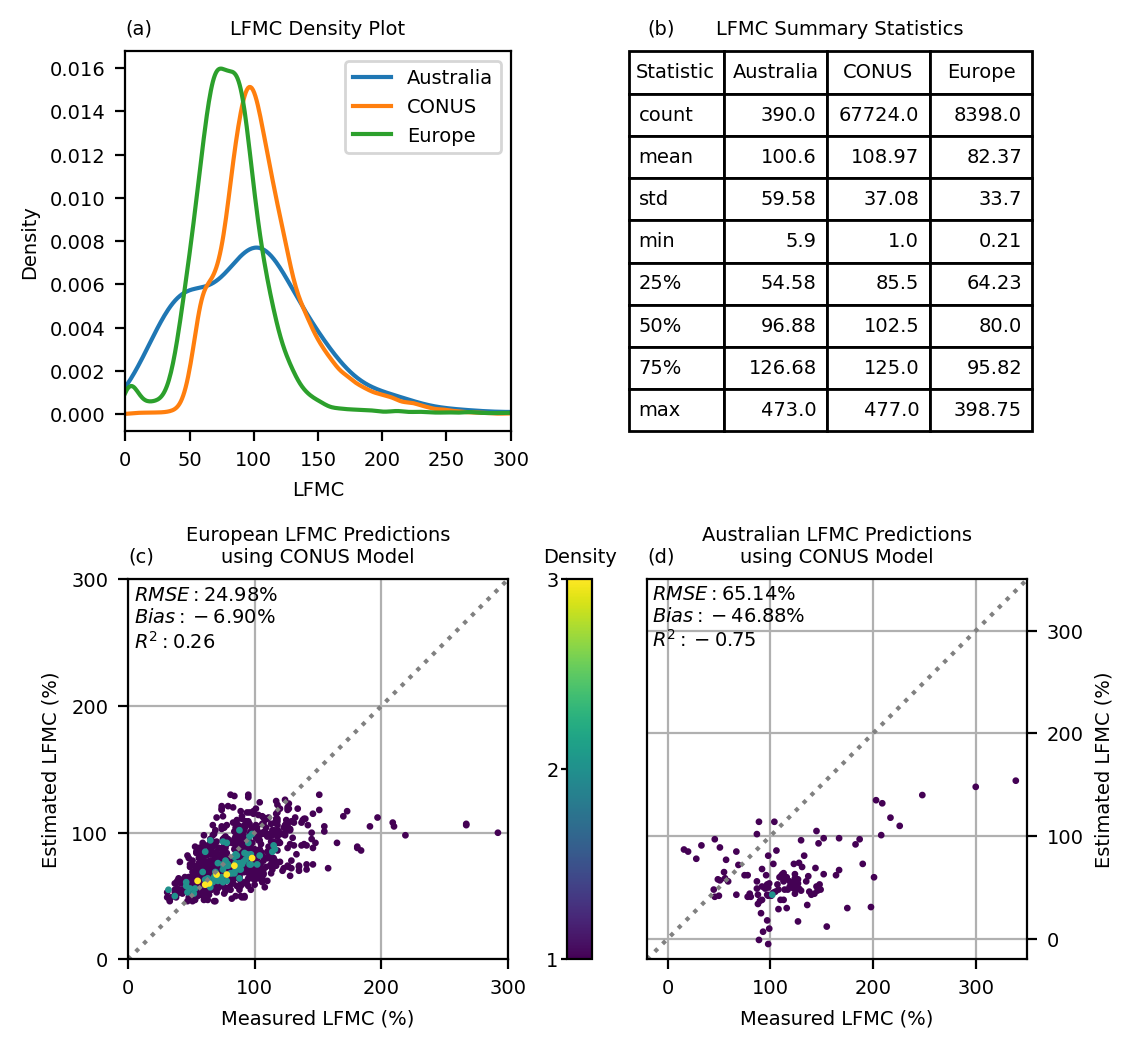

In [27]:
vmin = 1
vmax = 3

fig1, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(5.49, 5.125), constrained_layout=True, linewidth=1, dpi=200, 
                                         gridspec_kw={'wspace': 0, 'hspace': 0.05})
#                                         gridspec_kw={'width_ratios': [2, 2.75, 2, 2], 'wspace': 0.05})
australia_samples['LFMC value'].plot.kde(ax=ax1)
conus_samples['LFMC value'].plot.kde(ax=ax1)
europe_samples['LFMC value'].plot.kde(ax=ax1)
ax1.set_xlim(0, 300)
ax1.set_xlabel('LFMC')
ax1.legend(['Australia', 'CONUS', 'Europe'])
ax1.set_title('LFMC Density Plot')
ax1.set_title('(a)', loc='left')
#ax1.text(-100, 0.018, '(a)', size=MEDIUM_SIZE)

tab_ = ax2.table(cellText=df1.values, rowLabels=df1.index, colLabels=df1.columns, loc='top',
                 bbox=[0.2, 0, 0.8, 1], fontsize=SMALL_SIZE)
tab_.auto_set_font_size(False)
width_ = tab_[1, -1].get_width()
height_ = tab_[0, 0].get_height()
tab_.add_cell(0, -1, width=width_, height=height_, text=f'Statistic')
tab_.set(fontsize=SMALL_SIZE)
ax2.axis('off')
ax2.set_title('LFMC Summary Statistics')
ax2.set_title('(b)', loc='left')
#ax2.text(0, 1.07, '(b)', size=MEDIUM_SIZE, ha='right')

results = pd.read_csv(os.path.join(model_dir_eur, 'test0', 'epoch0', 'ensemble_predicts.csv'))
stats_ = {'RMSE': 24.20, 'R2': 0.30, 'Bias': -3.53}
x1 = plot_results(None, y=results.y, yhat=results.base, top_text=calc_statistics(results.y, results.base),
                   diagonal=True, lower=0, upper=300, ax=ax3, show_grid=True, vmin=vmin, vmax=vmax)
ax3.set_aspect("equal")
ax3.set_title("European LFMC Predictions\nusing CONUS Model")
ax3.set_xticks([0, 100, 200, 300])
ax3.set_yticks([0, 100, 200, 300])
ax3.set_title('(c)', loc='left')
#ax3.text(-50, 330, '(c)', size=MEDIUM_SIZE, ha='right')

results = pd.read_csv(os.path.join(model_dir_aus, 'test0', 'epoch0', 'ensemble_predicts.csv'))
stats_ = {'RMSE': 65.14, 'R2': -0.75, 'Bias': -46.88}
x2 = plot_results(None, y=results.y, yhat=results.base, top_text=stats_, #calc_statistics(results.y, results.base),
                   diagonal=True, lower=-20, upper=350, ax=ax4, show_grid=True, vmin=vmin, vmax=vmax)
ax4.set_aspect("equal")
ax4.set_title("Australian LFMC Predictions\nusing CONUS Model")
ax4.set_xticks([0, 100, 200, 300])
ax4.set_yticks([0, 100, 200, 300])
ax4.set_title('(d)', loc='left')
#ax4.text(-50, 380, '(d)', size=MEDIUM_SIZE, ha='right')
ax4.yaxis.set_label_position("right")
ax4.yaxis.tick_right()

cbar1 = fig1.colorbar(cm.ScalarMappable(norm=Normalize(vmin=vmin, vmax=vmax)),# cmap=cmap),
                     ax=ax4, location='left', aspect=15, fraction=0.075, pad=0.1, # if idx==3 else 0.025,
                     ticks=range(vmax+1))
cbar1.ax.tick_params(axis='y', labelsize=7, length=2, pad=1)
cbar1.ax.set_title('Density')

fig1.savefig(os.path.join(common.FIGURES_DIR, 'Domain shifts.jpeg'), format="jpeg", bbox_inches='tight', pad_inches=0.02, dpi=300)

In [12]:
df1 = pd.concat([
    australia_samples.groupby('Czone3').size(),
    conus_samples.groupby('Czone3').size(),
    europe_samples.groupby('Czone3').size()],
    axis=1, keys=['Australia', 'CONUS', 'Europe']).sort_index().convert_dtypes()

df2 = pd.concat([
    australia_samples.groupby('Land Cover').size(),
    conus_samples.groupby('Land Cover').size(),
    europe_samples.groupby('Land Cover').size()],
    axis=1, keys=['Australia', 'CONUS', 'Europe']).sort_index().convert_dtypes()
df2 = df2.rename(index={lc: lc.split(' (')[0].replace(', closed to open', '') for lc in df2.index})
df2 = df2.rename(index={lc: lc.split(' (')[0].replace('Tree cover', 'Trees') for lc in df2.index})

df3 = pd.concat([
    australia_samples.groupby('LC Category').size(),
    conus_samples.groupby('LC Category').size(),
    europe_samples.groupby('LC Category').size()],
    axis=1, keys=['Australia', 'CONUS', 'Europe']).sort_index().convert_dtypes()

display_frames([df1, df3, df2], ['Climate Zones', 'Land Cover Categories', 'Land Cover Classes'])

,Australia,CONUS,Europe
Czone3,,,
Aw,9,,
BSh,27,924,
BSk,18,24583,759
BWh,11,40,
BWk,,2329,
Cfa,43,4564,556
Cfb,250,299,410
Csa,9,11467,5052
Csb,23,4597,1444


In [13]:
all_samples1 = pd.concat([australia_samples, europe_samples, conus_samples], keys=['Australia', 'Europe', 'CONUS'])
all_samples1 = all_samples1.reset_index(level=0).rename(columns={'level_0': 'Country', 'Czone3': 'Climate Zone'})
all_samples1 = all_samples1[['Country', 'LFMC value', 'Land Cover', 'LC Category', 'Climate Zone']]
all_samples1['Land Cover'] = all_samples1['Land Cover'].str.split(' \(', expand=True)[0].str.replace(', closed to open', '')
all_samples1['Land Cover'] = all_samples1['Land Cover'].str.split(' \(', expand=True)[0].str.replace('Tree cover', 'Trees')
all_samples1.loc[(all_samples1['LC Category'] == 'Other'), 'Land Cover'] = 'Other'
all_samples1.loc[(all_samples1['Land Cover'] == 'Mosaic herbaceous cover'), 'Land Cover'] = 'Herbaceous cover'

In [14]:
all_samples2 = all_samples1.loc[:, ['Country', 'LFMC value']]
all_samples2['Land Cover'] = 'All Land Covers'
all_samples2['LC Category'] = 'All Land Covers'
all_samples2['Climate Zone'] = 'All Climate Zones'

In [15]:
all_samples = pd.concat([all_samples2, all_samples1])

## Climate Zone Distributions

In [16]:
cz_file = os.path.join(common.SOURCE_DIR, 'climate_zones.csv')
cz_colours = pd.read_csv(cz_file, index_col=1)[['Red', 'Green', 'Blue']]
cz_colours = cz_colours.merge(all_samples1['Climate Zone'].drop_duplicates(), left_index=True, right_on='Climate Zone').set_index('Climate Zone')

colours = cz_colours.sort_index().T.to_dict()
colours = {key: np.array([x/255 for x in value.values()]) for key, value in colours.items()}

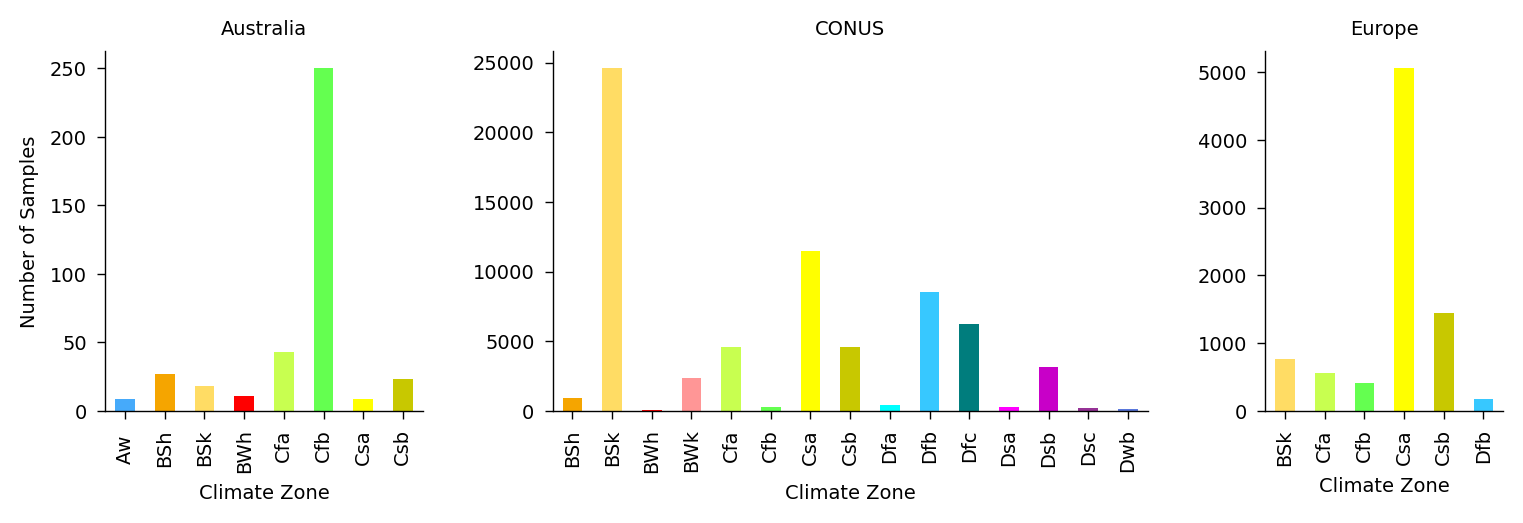

In [17]:
fig_df = all_samples1.groupby(['Climate Zone', 'Country']).size().reset_index()
fig_df.rename(columns={0: 'Number of Samples'}, inplace=True)
fig_df_ = fig_df.set_index(['Country', 'Climate Zone'])

fig2, axes = plt.subplots(nrows=1, ncols=3, figsize=(7.5, 2.5), dpi=200, layout='constrained',
                          gridspec_kw={'width_ratios': [8, 15, 6], 'wspace': 0.1, 'hspace': 0.1})

fig_df_.loc['Australia'].plot.bar(ax=axes[0], y='Number of Samples',
                                  color=[v for k, v in colours.items() if k in fig_df_.loc['Australia'].index])
axes[0].set_title('Australia')
axes[0].set_ylabel('Number of Samples')

fig_df_.loc['CONUS'].plot.bar(ax=axes[1], y='Number of Samples',
                                  color=[v for k, v in colours.items() if k in fig_df_.loc['CONUS'].index])
axes[1].set_title('CONUS')

fig_df_.loc['Europe'].plot.bar(ax=axes[2], y='Number of Samples',
                                  color=[v for k, v in colours.items() if k in fig_df_.loc['Europe'].index])
axes[2].set_title('Europe')

for ax in axes:
    ax.tick_params('both', length=3, width=0.5, which='major')
    ax.legend().remove()
    for axis in ['bottom', 'left']:
        ax.spines[axis].set_linewidth(0.5)
    for axis in ['top', 'right']:
        ax.spines[axis].set_visible(False)


#fig2.savefig(os.path.join(output_dir, 'Climate zone dist.jpeg'), format="jpeg",
#                    bbox_inches='tight', pad_inches=0.05, dpi=500)

## Land Cover Distributions

In [18]:
colours_df = all_samples1[['LC Category', 'Land Cover']].drop_duplicates().sort_values(['LC Category', 'Land Cover']
    ).set_axis([f'{i+1:2d}' for i in range(len(all_samples1['Land Cover'].unique()))])
colours1 = [plt.get_cmap('Blues')(0.75), plt.get_cmap('Oranges')(0.6), plt.get_cmap('Greens')(0.75),
            plt.get_cmap('Reds')(0.75), plt.get_cmap('Purples')(0.7), ]
colours_df['colour'] = [plt.get_cmap('Blues')(0.8), plt.get_cmap('Blues')(0.55), plt.get_cmap('Blues')(0.3),
                        plt.get_cmap('Oranges')(1.0), plt.get_cmap('Oranges')(0.8), plt.get_cmap('Oranges')(0.6), plt.get_cmap('Oranges')(0.5),
                            plt.get_cmap('Oranges')(0.4), plt.get_cmap('Oranges')(0.3), plt.get_cmap('Oranges')(0.2),
                        plt.get_cmap('Greens')(0.8), plt.get_cmap('Greens')(0.5), #plt.get_cmap('Greens')(0.3),
                        plt.get_cmap('Greys')(0.8), #plt.get_cmap('Greys')(0.5), #plt.get_cmap('Reds')(0.4), plt.get_cmap('Reds')(0.3),
                        plt.get_cmap('Purples')(0.7), plt.get_cmap('Purples')(0.5),]
colours_df = colours_df.sort_values('Land Cover')

In [19]:
fig_df = all_samples1.groupby(['Land Cover', 'LC Category', 'Country']).size().reset_index()
fig_df.rename(columns={0: 'Number of Samples'}, inplace=True)
fig_df = fig_df.set_index(['Country', 'LC Category', 'Land Cover'])['Number of Samples'].unstack()

In [20]:
class LegendTitle(object):
    def __init__(self, text_props=None):
        self.text_props = text_props or {}
        super(LegendTitle, self).__init__()

    def legend_artist(self, legend, orig_handle, fontsize, handlebox):
        x0, y0 = handlebox.xdescent, handlebox.ydescent
        title = mtext.Text(x0, y0, orig_handle,  **self.text_props)
        handlebox.add_artist(title)
        return title

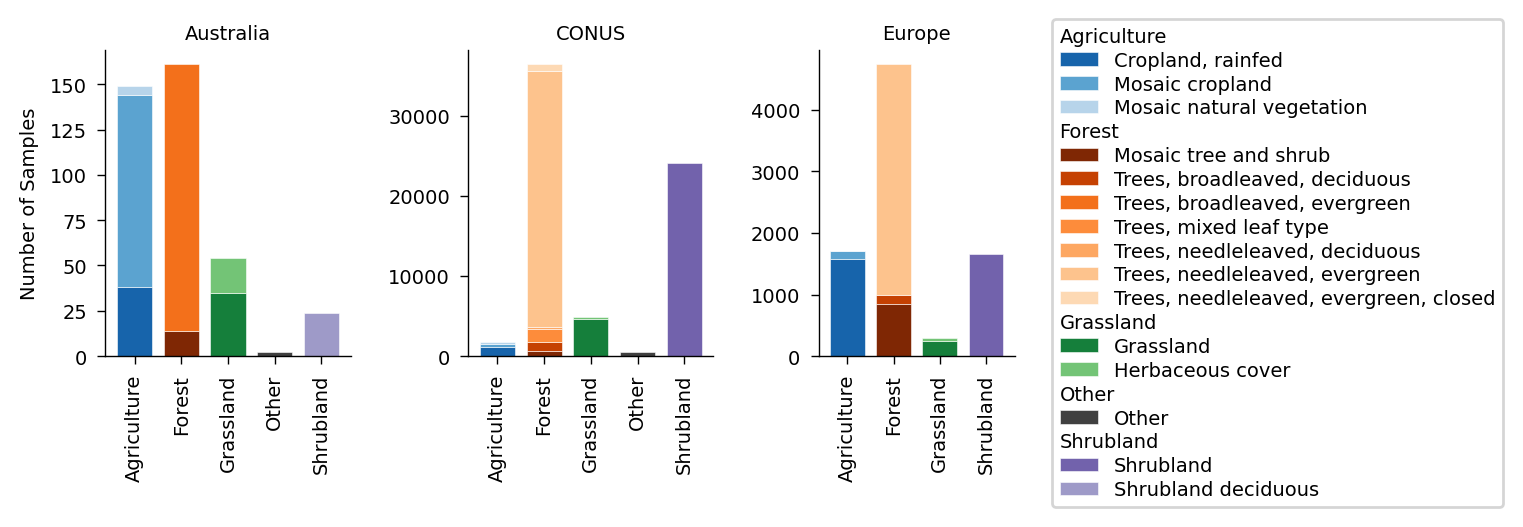

In [21]:
from matplotlib.colors import ListedColormap
colours = ListedColormap(colours_df.sort_values('Land Cover').colour)
fig3, axes = plt.subplots(nrows=1, ncols=4, figsize=(7.5, 2.5), dpi=200, layout='constrained',
                          gridspec_kw={'width_ratios': [5, 5, 4, 5], 'wspace': 0.1, 'hspace': 0.1})
fig_df.loc['Australia'].plot.bar(stacked=True, ax=axes[0], colormap=colours, lw=0.2, edgecolor='white', width=0.75)
axes[0].set_xlabel('Australia')
axes[0].xaxis.set_label_position('top')
axes[0].set_ylabel('Number of Samples')
fig_df.loc['CONUS'].plot.bar(stacked=True, ax=axes[1], colormap=colours, lw=0.2, edgecolor='white', width=0.75)
axes[1].set_xlabel('CONUS')
axes[1].xaxis.set_label_position('top')
fig_df.loc['Europe'].plot.bar(stacked=True, ax=axes[2], colormap=colours, lw=0.2, edgecolor='white', width=0.75)
axes[2].set_xlabel('Europe')
axes[2].xaxis.set_label_position('top')
# legend = axes[0].legend().get_legend_handler()
# axes[3].legend(handles=legend[0], labels=legend[1])
# fig1.legend()
h, l = axes[0].get_legend_handles_labels()
legend = colours_df.merge(pd.Series(h, index=l, name='handles'), left_on='Land Cover', right_index=True).sort_index()
h = list(legend.handles)
l = list(legend['Land Cover'])

axes[3].legend(['Agriculture'] + h[:3] + ['Forest'] + h[3:10] + ['Grassland'] + h[10:12]+ ['Other'] + h[12:13] + ['Shrubland'] + h[13:], 
               [''] + l[:3] + [''] + l[3:10] + [''] + l[10:12] + [''] + l[12:13] + [''] + l[13:],
               handler_map={str: LegendTitle({'fontsize': 7})},
               bbox_to_anchor=(0, 0, 1, 1.1),
               borderaxespad=0, labelspacing=0.25
              )

#axes[3].legend(handles=list(legend.handles), labels=list(legend['Land Cover']), borderaxespad=0)
axes[3].axis("off")
for ax in axes[:3]:
    ax.get_legend().remove()
    
for ax in axes:
    ax.tick_params('both', length=3, width=0.5, which='major')
    #ax.legend().remove()
    for axis in ['bottom', 'left']:
        ax.spines[axis].set_linewidth(0.5)
    for axis in ['top', 'right']:
        ax.spines[axis].set_visible(False)

#fig3.savefig(os.path.join(output_dir, 'Land cover dist.jpeg'), format="jpeg",
#             bbox_inches='tight', pad_inches=0.05, dpi=500)

In [22]:
df1 = pd.concat([
    australia_samples[australia_samples['Sampling year'].between(2014, 2016)].groupby('Czone3').size(),
    conus_samples[conus_samples['Sampling year'].between(2014, 2016)].groupby('Czone3').size(),
    europe_samples[europe_samples['Sampling year'].between(2014, 2016)].groupby('Czone3').size()],
    axis=1, keys=['Australia', 'CONUS', 'Europe']).sort_index().convert_dtypes()

df2 = pd.concat([
    australia_samples[australia_samples['Sampling year'].between(2014, 2016)].groupby('Land Cover').size(),
    conus_samples[conus_samples['Sampling year'].between(2014, 2016)].groupby('Land Cover').size(),
    europe_samples[europe_samples['Sampling year'].between(2014, 2016)].groupby('Land Cover').size()],
    axis=1, keys=['Australia', 'CONUS', 'Europe']).sort_index().convert_dtypes()
df2 = df2.rename(index={lc: lc.split(' (')[0].replace(', closed to open', '') for lc in df2.index})
df2 = df2.rename(index={lc: lc.split(' (')[0].replace('Tree cover', 'Trees') for lc in df2.index})

df3 = pd.concat([
    australia_samples[australia_samples['Sampling year'].between(2014, 2016)].groupby('LC Category').size(),
    conus_samples[conus_samples['Sampling year'].between(2014, 2016)].groupby('LC Category').size(),
    europe_samples[europe_samples['Sampling year'].between(2014, 2016)].groupby('LC Category').size()],
    axis=1, keys=['Australia', 'CONUS', 'Europe']).sort_index().convert_dtypes()

display_frames([df1, df3, df2], ['Climate Zones', 'Land Cover Categories', 'Land Cover Classes'])

,Australia,CONUS,Europe
Czone3,,,
BSh,,285,
BSk,,5391,16
BWh,,11,
BWk,,444,
Cfa,13,1185,78
Cfb,100,63,22
Csa,6,2970,596
Csb,9,1602,114
Dfa,,170,
